In [42]:
import importlib
import Parallel_Run_Average_Entropy_Shared_Mem
importlib.reload(Parallel_Run_Average_Entropy_Shared_Mem)
from Parallel_Run_Average_Entropy_Shared_Mem import *

import matplotlib.pyplot as plt
import sys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis/')
sys.path.append('/home/hugo/PostDoc/aging_condensates/Gillespie/Analysis/')
import ToolBox
importlib.reload(ToolBox)
from ToolBox import *

sys.path.append('/home/hcleroy/Extra_Module_py')
sys.path.append('/home/hugo/Extra_Module_py')
sys.path.append('/home/hcleroy/Extra_Module_py')
import formated_matplotlib

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)
MaxEnt = lambda N,L : 1.5* (N-1) * (np.log(3/(2*np.pi*L/N)) -1)

In [43]:
# gillespie parameter
Nlinker = 2
ell_tot = 10**3
V = 4/3*np.pi*(ell_tot/6)**1.5
kdiff = 50/(V) # for 3D
Energy = -15
Nprocess = 1000
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]

# Simulation parameters
step_tot = 10000
compute_steps = 10

In [44]:
# one linker
ST1 = average_simulations(args,step_tot,compute_steps)

8.04700999999999


In [6]:
# 2 linkers
for n in range(args.__len__()):
    args[n][-2] = 3
step_tot = 20000
ST2 = average_simulations(args,step_tot,compute_steps)

4.791579999999994


In [9]:
# 3 linkers
for n in range(args.__len__()):
    args[n][-2] = 4
step_tot = 30000
ST3 = average_simulations(args,step_tot,compute_steps)

3.4491866666666655


In [10]:
# 10 linkers
for n in range(args.__len__()):
    args[n][-2] = 10
step_tot = 100000
ST10 = average_simulations(args,step_tot,compute_steps)

1.3386809999999998


In [2]:
#np.save("Res/1_2_3_10_linkers/1_linker.npy",ST1)
#np.save("Res/1_2_3_10_linkers/2_linker.npy",ST2)
#np.save("Res/1_2_3_10_linkers/3_linker.npy",ST3)
#np.save("Res/1_2_3_10_linkers/10_linker.npy",ST10)
#ST1 = np.load('Res/1_2_3_10_linkers/1_linker.npy')
#ST2 = np.load('Res/1_2_3_10_linkers/2_linker.npy')
#ST3 = np.load('Res/1_2_3_10_linkers/3_linker.npy')
#ST10 = np.load('Res/1_2_3_10_linkers/10_linker.npy')

In [16]:
(2*Energy - ell_tot * np.log(4*np.pi))

-2561.0242469692907

In [26]:
MinEnt(2,ell_tot)

2519.093437655046

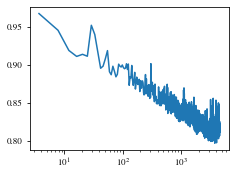

In [45]:
plt.plot(ST1[:,0],ST1[:,1] ,label='1 linker')
plt.xscale('log')

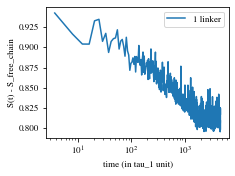

In [25]:
plt.plot(ST1[:,0],(ST1[:,1] - (2*Energy - ell_tot * np.log(4*np.pi)))/(-MinEnt(2,ell_tot) + ell_tot*np.log(4*np.pi)),label='1 linker')
#plt.plot(ST2[:,0],ST2[:,1]/MaxEnt(3,10**3),label='2 linker')
#plt.plot(ST3[:,0],ST3[:,1]/MaxEnt(4,10**3) ,label='3 linker')
#plt.plot(ST10[:,0],ST10[:,1]/abs(min(ST10[:,1])),label='10 linker')
plt.xlabel('time (in tau_1 unit)')
plt.ylabel('S(t) - S_free_chain')
plt.xscale('log')
plt.legend()
#plt.savefig('Res/1_2_3_10_linkers/S_of_t.svg',bbox_inches='tight',transparent=True)

In [15]:
# gillespie parameter
Nlinker = 10
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 100/(V) # for 3D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 100000
compute_steps = 30

6.976931674754073


In [16]:
# 10 linkers
ST10 = average_simulations(args,step_tot,compute_steps)

7.721770000000003


In [17]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
#V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
#kdiff = 1/(V) # for 1D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 200000
compute_steps = 30

5.937210903914155


In [18]:
ST20 = average_simulations(args,step_tot,compute_steps)

4.0279549999999995


In [19]:
# gillespie parameter
Nlinker = 30
ell_tot = 10**3
#V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
#kdiff = 1/(V) # for 1D
Energy = -15
Nprocess = 10
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 300000
compute_steps = 30

5.329013241751908


In [20]:
ST30 = average_simulations(args,step_tot,compute_steps)

2.7567666666666666


In [16]:
#np.save("Res/10_20_30_linkers/10_linker.npy",ST10)
#np.save("Res/10_20_30_linkers/20_linker.npy",ST20)
#np.save("Res/10_20_30_linkers/30_linker.npy",ST30)
ST10 = np.load("Res/10_20_30_linkers/10_linker.npy")
ST20 = np.load("Res/10_20_30_linkers/20_linker.npy")
ST30 = np.load("Res/10_20_30_linkers/30_linker.npy")

In [32]:
X_av_10,Y_av_10 = moving_average(ST10[4:,0],ST10[4:,1]/MaxEnt(11,10**3),50)
X_av_20,Y_av_20 = moving_average(ST20[4:,0],ST20[4:,1]/MaxEnt(21,10**3),50)
X_av_30,Y_av_30 = moving_average(ST30[4:,0],ST30[4:,1]/MaxEnt(31,10**3),50)

(0.7, 1.0)

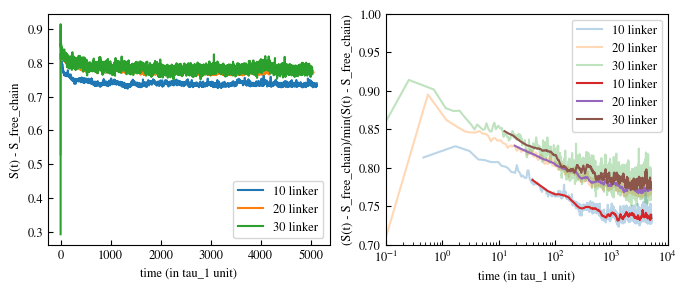

In [33]:
fig, ax = plt.subplots(ncols=2,figsize=(8,3))
ax[0].plot(ST10[:,0],ST10[:,1]/MaxEnt(11,10**3),label='10 linker')#/abs(min(ST10[:,1]))
ax[0].plot(ST20[:,0],ST20[:,1]/MaxEnt(21,10**3),label='20 linker')#/abs(min(ST20[:,1]))
ax[0].plot(ST30[:,0],ST30[:,1]/MaxEnt(31,10**3),label='30 linker')#/abs(min(ST30[:,1]))
ax[1].plot(ST10[:,0],ST10[:,1]/MaxEnt(11,10**3),label='10 linker',alpha=0.3)
ax[1].plot(ST20[:,0],ST20[:,1]/MaxEnt(21,10**3),label='20 linker',alpha=0.3)
ax[1].plot(ST30[:,0],ST30[:,1]/MaxEnt(31,10**3),label='30 linker',alpha=0.3)

ax[1].plot(X_av_10,Y_av_10,label='10 linker')
ax[1].plot(X_av_20,Y_av_20,label='20 linker')
ax[1].plot(X_av_30,Y_av_30,label='30 linker')

ax[0].set_xlabel('time (in tau_1 unit)')
ax[0].set_ylabel('S(t) - S_free_chain')
ax[1].set_xlabel('time (in tau_1 unit)')
ax[1].set_ylabel('(S(t) - S_free_chain)/min(S(t) - S_free_chain)')
#ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[1].set_xlim(10**-1,10**4)
ax[0].legend()
ax[1].legend()
ax[1].set_ylim(0.7,1)
#fig.savefig('Res/10_20_30_linkers/S_of_t.svg',transparent=True,bbox_inches='tight')

In [34]:
# gillespie parameter
Nlinker = 10
ell_tot = 10**3
#V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
#kdiff = 1/(V) # for 1D
Energy = -8
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 100000
compute_steps = 30

6.976931674754073


In [35]:
ST10_b = average_simulations(args,step_tot,compute_steps)

KeyboardInterrupt: 

In [ ]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
#V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
#kdiff = 1/(V) # for 1D
Energy = -8
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 200000
compute_steps = 30

5.937210903914155


In [ ]:
ST20_b = average_simulations(args,step_tot,compute_steps)

3.8798699999999995


In [ ]:
# gillespie parameter
Nlinker = 30
ell_tot = 10**3
#V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
#kdiff = 1/(V) # for 1D
Energy = -8
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 300000
compute_steps = 30

5.329013241751908


In [ ]:
ST30_b = average_simulations(args,step_tot,compute_steps)

2.6978000000000004


In [36]:
#np.save("Res/E_8_15/10_linker.npy",ST10_b)
#np.save("Res/E_8_15/20_linker.npy",ST20_b)
#np.save("Res/E_8_15/30_linker.npy",ST30_b)

ST10_b = np.load("Res/E_8_15/10_linker.npy")
ST20_b = np.load("Res/E_8_15/20_linker.npy")
ST30_b = np.load("Res/E_8_15/30_linker.npy")

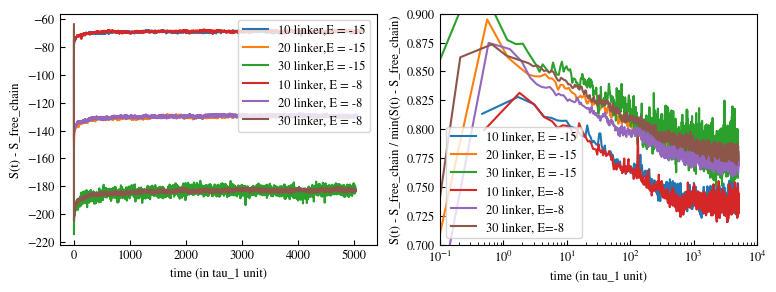

In [40]:
fig, ax = plt.subplots(ncols=2,figsize=(9,3))
ax[0].plot(ST10[:,0],ST10[:,1],label='10 linker,E = -15')#/abs(min(ST10[:,1]))
ax[0].plot(ST20[:,0],ST20[:,1],label='20 linker,E = -15')#/abs(min(ST20[:,1]))
ax[0].plot(ST30[:,0],ST30[:,1],label='30 linker,E = -15')#/abs(min(ST30[:,1]))
ax[1].plot(ST10[:,0],ST10[:,1]/MaxEnt(11,10**3),label='10 linker, E = -15')
ax[1].plot(ST20[:,0],ST20[:,1]/MaxEnt(21,10**3),label='20 linker, E = -15')
ax[1].plot(ST30[:,0],ST30[:,1]/MaxEnt(31,10**3),label='30 linker, E = -15')



ax[0].plot(ST10_b[:,0],ST10_b[:,1],label='10 linker, E = -8')#/abs(min(ST10[:,1]))
ax[0].plot(ST20_b[:,0],ST20_b[:,1],label='20 linker, E = -8')#/abs(min(ST20[:,1]))
ax[0].plot(ST30_b[:,0],ST30_b[:,1],label='30 linker, E = -8')#/abs(min(ST30[:,1]))
ax[1].plot(ST10_b[:,0],ST10_b[:,1]/MaxEnt(11,10**3),label='10 linker, E=-8')
ax[1].plot(ST20_b[:,0],ST20_b[:,1]/MaxEnt(21,10**3),label='20 linker, E=-8')
ax[1].plot(ST30_b[:,0],ST30_b[:,1]/MaxEnt(31,10**3),label='30 linker, E=-8')

ax[0].set_xlabel('time (in tau_1 unit)')
ax[0].set_ylabel('S(t) - S_free_chain')
ax[1].set_xlabel('time (in tau_1 unit)')
ax[1].set_ylabel('S(t) - S_free_chain / min(S(t) - S_free_chain)')
ax[1].set_xscale('log')
ax[1].set_xlim(0.1,10**4)
ax[1].set_ylim(0.7,0.9)
ax[0].legend(loc=1)
ax[1].legend()
#fig.savefig('Res/E_8_15/Entropy_timeevolution_vs_Nlinker.svg',transparent=True,bbox_inches= 'tight')

In [2]:
# import files from the big simulations :
ell_tot = 10**3
NRG = lambda eta,Ec : (1+eta)*Ec
Energy_range_10_linkers = NRG(np.linspace(0,2,20),Ec(ell_tot,10))
ST_10 = []
for E in Energy_range_10_linkers:
    ST_10.append(np.load("Res/Big_Simul/ST10_"+str(truncate(E,3))+".npy"))
Energy_range_20_linkers = NRG(np.linspace(0,2,20),Ec(ell_tot,20))
ST_20 = []
for E in Energy_range_20_linkers:
    ST_20.append(np.load("Res/Big_Simul/ST20_"+str(truncate(E,3))+".npy"))

In [8]:
ST_20[1]

array([[ 4.76810266e+05, -2.08455108e-05],
       [ 9.57158490e+05, -1.51166143e-05],
       [ 1.43889409e+06, -1.11720142e-05],
       ...,
       [ 3.26654464e+09, -1.03943165e-05],
       [ 3.26705394e+09, -1.23022701e-05],
       [ 3.26754103e+09, -1.27465807e-05]])

In [39]:
# let us run more of these, but parametering the relative distance with the critical energy

In [24]:
# gillespie parameter
Nlinker = 10
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 100000
compute_steps = 30
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

6.976931674754073


In [25]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST10_big = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST10_"+str(truncate(Energy,3))+".npy",ST10_big)

KeyboardInterrupt: 

In [ ]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 200000
compute_steps = 30
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

5.937210903914155


In [ ]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST20_big = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST20_"+str(truncate(Energy,3))+".npy",ST20_big)

array([ 5.32901324,  5.889962  ,  6.45091077,  7.01185953,  7.57280829,
        8.13375705,  8.69470582,  9.25565458,  9.81660334, 10.3775521 ,
       10.93850086, 11.49944963, 12.06039839, 12.62134715, 13.18229591,
       13.74324468, 14.30419344, 14.8651422 , 15.42609096, 15.98703973])

In [ ]:
# gillespie parameter
Nlinker = 30
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 300000
compute_steps = 30
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

In [ ]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST30_big = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST30_"+str(truncate(Energy,3))+".npy",ST30_big)

In [ ]:
# gillespie parameter
Nlinker = 40
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 400000
compute_steps = 40
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

4.897490133074237


In [ ]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST40_big = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST40_"+str(truncate(Energy,3))+".npy",ST40_big)

In [ ]:
# gillespie parameter
Nlinker = 40
ell_tot = 10**4
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 400000
compute_steps = 40
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

8.351367772565306


In [ ]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST40_LE4 = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST_LE4_40_"+str(truncate(Energy,3))+".npy",ST40_LE4)